In [1]:
import pandas as pd

mat = pd.read_csv("train-student-mat.csv")

por = pd.read_csv("train-student-por.csv")

In [4]:
#과목별 평균을 기준으로 새로운 G1_X 열 만들기
por['G1_X'] = por['G1'] - por['G1'].mean()
mat['G1_X'] = mat['G1'] - mat['G1'].mean()


#열 이름 변경
#por.rename(columns={'G1': 'G1_por'}, inplace=True)
#mat.rename(columns={'G1': 'G1_mat'}, inplace=True)

#데이터 합치기
df = pd.concat([por, mat])

In [5]:
df['address'].unique()

array(['U', 'R'], dtype=object)

In [6]:
df1 = df[df['address']=='R']

In [8]:
g1X = df1[['age', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'studytime',
       'failures', 'freetime', 'goout',
       'Walc', 'health', 'absences']]

g1y = df1['G1']

In [11]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 각 열에 대해 라벨 인코딩을 수행합니다.
for col in g1X.columns:
    if g1X[col].dtype == 'object':  # 문자열 형식인 열만 처리합니다.
        g1X[col] = label_encoder.fit_transform(g1X[col])

C:\Users\user\AppData\Local\Temp\ipykernel_7872\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])
C:\Users\user\AppData\Local\Temp\ipykernel_7872\3706108745.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g1X[col] = label_encoder.fit_transform(g1X[col])


In [10]:
columns = g1X.columns

for col in columns:
    print(col, g1X[col].unique())

age [15 16 17 18 20 19 21]
Medu [2 4 3 1 0]
Fedu [4 3 2 1 0]
Mjob ['services' 'teacher' 'other' 'at_home' 'health']
Fjob ['health' 'at_home' 'teacher' 'other' 'services']
studytime [3 2 1 4]
failures [0 1 3 2]
freetime [3 5 4 1 2]
goout [2 3 1 4 5]
Walc [1 3 4 5 2]
health [5 2 4 3 1]
absences [ 2  0  4  8  6 14 16 21 12 15 13  5  7  3  1  9 11 10 20 18 75 40 17]


In [12]:
# 데이터 분할하기
# Train, Test 데이터 분리
from sklearn.model_selection import train_test_split

g1X_train, g1X_test, g1y_train, g1y_test = train_test_split(g1X, g1y, test_size=0.2, random_state=42)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 선형 회귀 모델을 초기화하고 훈련합니다.
model = LinearRegression()
model.fit(g1X_train, g1y_train)

# 테스트 세트를 사용하여 예측을 수행합니다.
y_pred = model.predict(g1X_test)


# 예측 결과를 평가
mse = mean_squared_error(g1y_test, y_pred)
print("LinearRegression 평균제곱오차 MSE:", mse)


LinearRegression 평균제곱오차 MSE: 7.025630860381643


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


# Random Forest 회귀 모델 생성
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 훈련
model_rf.fit(g1X_train, g1y_train)

# 테스트 데이터로 예측
y_pred_rf = model_rf.predict(g1X_test)

# 평가: 평균 제곱 오차(MSE)
mse_rf = mean_squared_error(g1y_test, y_pred_rf)
print("Random Forest 모델의 평균 제곱 오차(MSE):", mse_rf)




Random Forest 모델의 평균 제곱 오차(MSE): 5.7863195779727095


In [15]:
from lightgbm import LGBMRegressor

# 모델 재훈련
lg_model = LGBMRegressor(random_state=0, verbose=-1)
lg_model.fit(g1X_train, g1y_train)

# 재예측
lg_y_pred = lg_model.predict(g1X_test)

# 평가: 평균 제곱 오차(MSE)
mse_lg = mean_squared_error(g1y_test, lg_y_pred)

print("LightGBM 모델의 평균 제곱 오차(MSE):", mse_lg)

LightGBM 모델의 평균 제곱 오차(MSE): 6.989838236336496


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE


# 정규화
scaler = StandardScaler()

mm_X_train = scaler.fit_transform(g1X_train)
mm_X_test = scaler.transform(g1X_test)

# 모델 재훈련
#lgbm
mm_model = LGBMRegressor(random_state=0, verbose=-1)
mm_model.fit(mm_X_train, g1y_train)
# 랜덤포레스트
model_rf.fit(mm_X_train, g1y_train)

#재예측
mm_y_pred = mm_model.predict(mm_X_test)
mrf_y_pred = model_rf.predict(mm_X_test)

#평가: 평균 제곱 오차(MSE)
mse_mm = mean_squared_error(g1y_test, mm_y_pred)
mse_mrf = mean_squared_error(g1y_test, mrf_y_pred)


#MinMaxScaler
n_scaler = MinMaxScaler()

nn_X_train = n_scaler.fit_transform(g1X_train)
nn_X_test = n_scaler.transform(g1X_test)

# 모델 재훈련
nn_model = LGBMRegressor(random_state=0, verdose=-1)
nn_model.fit(nn_X_train, g1y_train)

# 랜덤포레스트
model_rf.fit(nn_X_train, g1y_train)

#재예측
nn_y_pred = nn_model.predict(nn_X_test)
nrf_y_pred = model_rf.predict(nn_X_test)


# 평가: 평균 제곱 오차(MSE)
mse_nn = mean_squared_error(g1y_test, nn_y_pred)
mse_nrf = mean_squared_error(g1y_test, nrf_y_pred)


[LightGBM] [Warning] Unknown parameter: verdose
[LightGBM] [Warning] Unknown parameter: verdose
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000061 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 12
[LightGBM] [Info] Start training from score 10.653509
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

In [17]:
print("Standard 후 LightGBM 모델의 평균 제곱 오차(MSE):", mse_mm)
print("MinMax 후 LightGBM 모델의 평균 제곱 오차(MSE):", mse_nn)

print("Standard 후 랜덤포레스트 모델의 평균 제곱 오차(MSE):", mse_mrf)
print("MinMax 후 랜덤포레스트 모델의 평균 제곱 오차(MSE):", mse_nrf)

Standard 후 LightGBM 모델의 평균 제곱 오차(MSE): 6.989838236336496
MinMax 후 LightGBM 모델의 평균 제곱 오차(MSE): 6.989838236336496
Standard 후 랜덤포레스트 모델의 평균 제곱 오차(MSE): 5.854800007309943
MinMax 후 랜덤포레스트 모델의 평균 제곱 오차(MSE): 5.79376741423002


C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\anacon

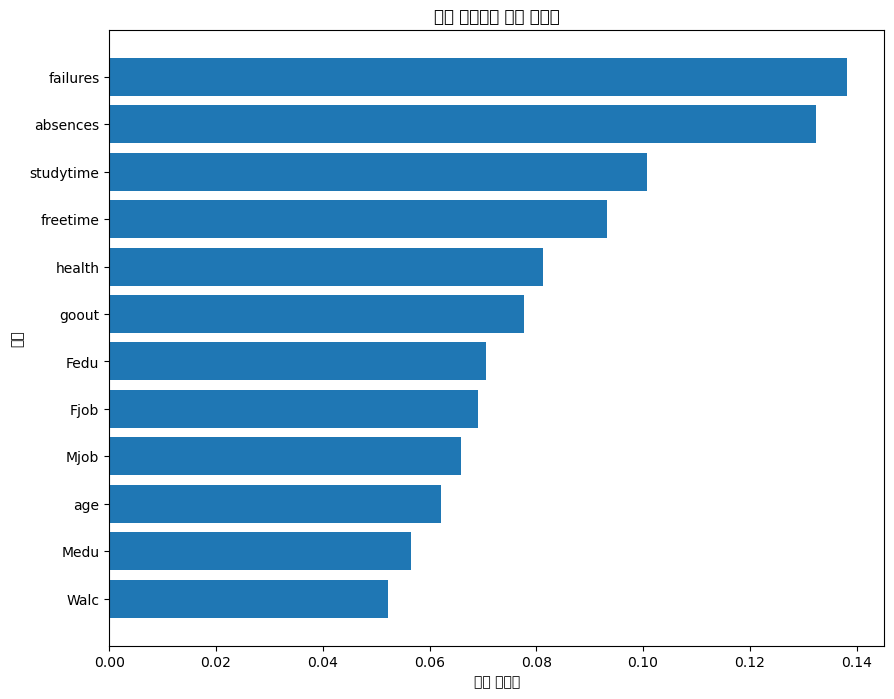

In [18]:
feature_importance = model_rf.feature_importances_
    

import matplotlib.pyplot as plt

# 중요도를 기준으로 특성을 정렬
sorted_idx = feature_importance.argsort()

# 중요도가 높은 특성 순으로 이름과 중요도 추출
sorted_feature_names = g1X.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# 막대 그래프로 특성 중요도 시각화
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_importance)), sorted_importance, align='center')
plt.yticks(range(len(sorted_importance)), sorted_feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.title('랜덤 포레스트 특성 중요도')
plt.show()
